In [123]:
#Importing Data from the CSV file
import os
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q3")
print("Path has been changed to:\n", os.getcwd())

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import math

#Importing Data X from the CSV file
X = np.genfromtxt('logisticX.csv', delimiter=',')

#Importing Data Y from the CSV file
Y = np.genfromtxt('logisticY.csv', delimiter='\n').reshape(-1,1)
#print(Y)
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques3")
print("Path changed back to python file directory:\n", os.getcwd())

m = X.shape[0]
print("\nThe number of training samples m=",m)

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q3
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques3

The number of training samples m= 100


In [124]:
#Normalization of the Input X
mean = np.mean(X)
var = np.std(X)
#print(mean, var)
X -= mean
X /= var
print("Mean and Variance of the Normalized Data= {}, {}".format(np.mean(X), np.std(X)))
X= np.append(np.ones((X.shape[0],1)), X, axis=1)


Mean and Variance of the Normalized Data= 2.708944180085382e-16, 1.0


In [125]:
#parameter initialization
theta = np.zeros((X.shape[1],1)) #initialize to zero
print("The initial value of Theta is= \n",theta)

The initial value of Theta is= 
 [[0.]
 [0.]
 [0.]]


In [126]:
dist = np.dot(X,theta)
y_hyp = (1/(1 + np.exp(-dist)))

In [127]:
neg_ll = np.dot(Y.T, np.log(y_hyp)) + np.dot((1-Y).T, np.log(1-y_hyp))
grad_ll = np.dot(X.T, (y_hyp-Y))
I = np.identity(X.shape[0])
diag=I * np.dot(y_hyp.T,(1-y_hyp))
H = np.dot(X.T, np.dot(diag, X))


In [128]:
#Newton's Update Equation for theta (converges in one step for quadratic and linear)
theta_new = theta - np.dot(np.linalg.inv(H),grad_ll)
print("The final Theta from Newton's Method = \n", theta_new)

The final Theta from Newton's Method = 
 [[-0.00064394]
 [ 0.00921424]
 [-0.00898329]]


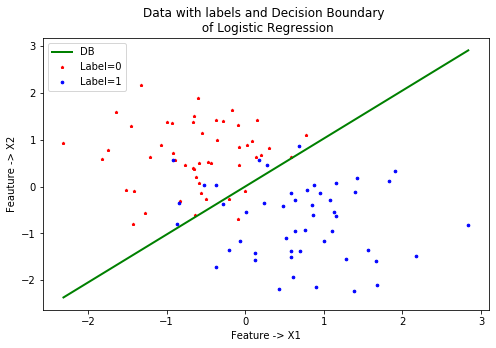

In [130]:
#Code for Plotting the Decision Boundary
index_x0=[i for i in range(len(Y)) if Y[i]==0]
index_x1=[i for i in range(len(Y)) if Y[i]==1]
x_val = np.array([np.min(X[:, 1] ), np.max(X[:, 1] )]).reshape(1,-1)
y_val = np.dot((-1./theta_new[2:3]),np.dot(theta_new[1:2], x_val)) - theta_new[0:1]
#Plot the training data with class labels
plt.figure(figsize=(8,5))
colors=['r' if l==0 else 'b' for l in Y]
plt.scatter(X[index_x0][:,1], X[index_x0][:,2], s = 7, marker='*', c='r',label='Label=0')
plt.scatter(X[index_x1][:,1], X[index_x1][:,2], s = 7, marker='o', c='b',label='Label=1')
plt.plot(x_val.ravel(), y_val.ravel(), c='g', linewidth=2, label='DB')
plt.legend()
plt.title('Data with labels and Decision Boundary \n of Logistic Regression')
plt.xlabel('Feature -> X1')
plt.ylabel('Feauture -> X2')
plt.show(block=False)
#plt.savefig('data.png', dpi=1000, bbox_inches='tight')
